In [1]:
import pandas as pd
import chembl_webresource_client.new_client as nc
from rdkit import Chem
from rdkit.Chem import PandasTools, AllChem
import requests
from bs4 import BeautifulSoup
from chembletouni import chemble_to_uni
from findpdb import get_pdb_with_best_resolution, get_all_pdb_entries
from webscraping import webScrape
from openbabel import run_openbabel
import pybel
from prody import *
from pylab import *

/home/raminrafiee/Desktop/personal/projects/automatedDrugrepurpose/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tr = nc.new_client.target


In [21]:
query = tr.search('jak').only('target_chembl_id', 'organism', 'pref_name')
query_pd = pd.DataFrame.from_dict(query)
query_pd



,organism,pref_name,target_chembl_id
0,Homo sapiens,Janus Kinase (JAK),CHEMBL2363062
1,Homo sapiens,JAK2/JAK3,CHEMBL4802035
2,Homo sapiens,Tyrosine-protein kinase JAK3,CHEMBL2148
3,Homo sapiens,JAK3/JAK1,CHEMBL3038491
4,Homo sapiens,JAK2/JAK1,CHEMBL3038492
5,Mus musculus,Tyrosine-protein kinase JAK1/JAK2,CHEMBL3885649
6,Mus musculus,Tyrosine-protein kinase JAK1/JAK3,CHEMBL3885650
7,Homo sapiens,Tyrosine-protein kinase JAK1,CHEMBL2835
8,Mus musculus,Tyrosine-protein kinase JAK1,CHEMBL2968
9,Homo sapiens,Tyrosine-protein kinase JAK2,CHEMBL2971


In [32]:
target = query_pd.iloc[2]

In [33]:
target

organism                            Homo sapiens
pref_name           Tyrosine-protein kinase JAK3
target_chembl_id                      CHEMBL2148
Name: 2, dtype: object

In [34]:
mych = str(target['target_chembl_id'])

In [35]:
uni = chemble_to_uni(mych)

In [15]:
best_pdb_id, best_length, best_resolution, chains = get_pdb_with_best_resolution(uni)

print(best_pdb_id,"| res : ", best_resolution, chains)

ConnectionError: HTTPSConnectionPool(host='www.uniprot.org', port=443): Max retries exceeded with url: /uniprot/P00519.txt (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f369685fc70>: Failed to resolve 'www.uniprot.org' ([Errno -2] Name or service not known)"))

In [27]:
pdbs = get_all_pdb_entries(uni)
df = pd.DataFrame(pdbs)
sorted_df = df.sort_values(by=['length', 'num_chains', 'resolution'], ascending=[False, False, True])
sorted_df['resolution'] = sorted_df['resolution'].astype(str)
sorted_df['length'] = sorted_df['length'].astype(str)
sorted_df['num_chains'] = sorted_df['num_chains'].astype(str)
print(sorted_df.head(),sorted_df.dtypes)

   pdb_id method resolution length num_chains
2    3LXL  X-ray       1.74    319          1
38   7Q6H  X-ray       1.75    319          1
1    3LXK  X-ray        2.0    319          1
6    4HVD  X-ray       1.85    314          1
10   4I6Q  X-ray       1.85    314          1 pdb_id        object
method        object
resolution    object
length        object
num_chains    object
dtype: object


In [10]:
atoms, header = parsePDB(best_pdb_id, header=True)
list(header)

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 3sxs downloaded (3sxs.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2351 atoms and 1 coordinate set(s) were parsed in 0.03s.


['helix',
 'helix_range',
 'sheet',
 'sheet_range',
 'chemicals',
 'polymers',
 'reference',
 'resolution',
 'biomoltrans',
 'version',
 'deposition_date',
 'classification',
 'identifier',
 'title',
 'experiment',
 'authors',
 'space_group',
 'related_entries',
 'PP2',
 'A']

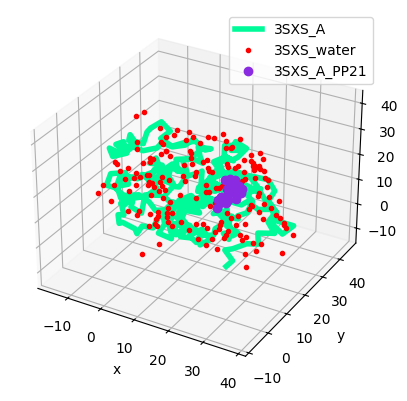

In [11]:
showProtein(atoms)
legend()

<Axes3D: xlabel='x', ylabel='y', zlabel='z'>

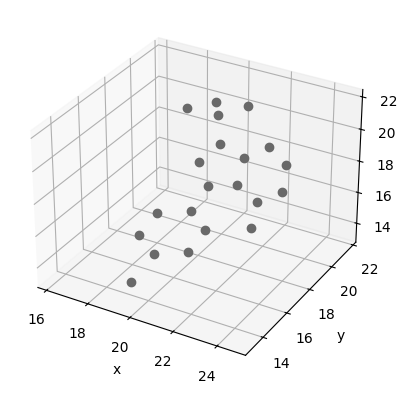

In [12]:
hetero = atoms.select('not water and not protein')
showProtein(hetero)

In [13]:
ligands = hetero.getHierView().iterResidues()
list_ligs = []
list_of_ligs = []
for i, residue in enumerate(ligands, start=1):
    list_of_ligs.append(i)
    list_ligs.append(str(residue))
    writePDB(f'{str(best_pdb_id)}_ligand_{i}', residue)

In [14]:
list_of_ligs
list_ligs

['PP2 1']

In [15]:
for i in list_of_ligs:
    run_openbabel(input_file=f'{str(best_pdb_id)}_ligand_{i}.pdb', input_format='pdb', output_file=f'{str(best_pdb_id)}_ligand_{i}.smi', output_format='smi')
    

In [16]:
smiles_l = []
for i in list_of_ligs:    
    with open(f'{str(best_pdb_id)}_ligand_{i}.smi', 'r') as file:
        content = file.read()
        smiles, filename = content.split()
        smiles_l.append(smiles)



In [17]:
smiles_l

['c12ncnc(c1c(nn2C(C)(C)C)c1ccc(cc1)Cl)N']

In [18]:
smile_dict = dict(zip(list_ligs, smiles_l))
smile_dict

{'PP2 1': 'c12ncnc(c1c(nn2C(C)(C)C)c1ccc(cc1)Cl)N'}

In [19]:
smile_dict.values()

dict_values(['c12ncnc(c1c(nn2C(C)(C)C)c1ccc(cc1)Cl)N'])

In [22]:
data = webScrape(smile_dict['PP2 1'])

No results for radio button index 4. Moving on...
No results for radio button index 7. Moving on...
No results for radio button index 14. Moving on...
No results for radio button index 17. Moving on...
No results for radio button index 19. Moving on...
No results for radio button index 24. Moving on...
No results for radio button index 27. Moving on...


In [24]:
df_drugs = pd.DataFrame(data)
df_sorted = df_drugs.sort_values(by='Score', ascending=False)

df_sorted

,SMILES_ID,SMILES_data,Molecule_ID,Score
313,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL16293,0.997
314,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL9113,0.973
87,DB11558,CC1=CC=CC=C1,DB11558,0.973
231,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL16293,0.857
230,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL46730,0.857
...,...,...,...,...
305,CHEMBL498623,OC(=O)CC[C@H](NC(=O)N[C@@H](CCCCNC(=O)NC1=CC=C...,CHEMBL3544919,None
306,CHEMBL4297413,FC(F)(F)C(C(F)(F)F)(C(F)(F)F)C1(F)C(F)(F)C(F)(...,CHEMBL4297413,None
307,CHEMBL4297413,FC(F)(F)C(C(F)(F)F)(C(F)(F)F)C1(F)C(F)(F)C(F)(...,CHEMBL4297283,None
308,CHEMBL4297413,FC(F)(F)C(C(F)(F)F)(C(F)(F)F)C1(F)C(F)(F)C(F)(...,CHEMBL3786673,None


In [25]:
df_drugsFriltered = df_sorted[df_sorted['Score'].astype(float) >= 0.5]

In [26]:
df_drugsFriltered

,SMILES_ID,SMILES_data,Molecule_ID,Score
313,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL16293,0.997
314,CHEMBL16293,C1=CC2=CC=CC=C2C=C1,CHEMBL9113,0.973
87,DB11558,CC1=CC=CC=C1,DB11558,0.973
231,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL16293,0.857
230,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL46730,0.857
1,DB11558,CC1=CC=CC=C1,DB06728,0.500
232,CHEMBL46730,C1=CC2=C(C=C1)C1=C(C=CC=C1)C=C2,CHEMBL9113,0.500
88,CHEMBL14060,OC1=CC=CC=C1,CHEMBL14060,0.500
0,DB11558,CC1=CC=CC=C1,DB11558,0.500
2,DB11558,CC1=CC=CC=C1,DB03255,0.500
